In [ ]:
# !pip install tensorflow==1.14
# !pip install keras==2.2.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import plotly.io as pio
import plotly.graph_objects as go

%matplotlib inline
%pylab inline
import plotly.io as pio
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%matplotlib inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from matplotlib.pyplot import figure
import statistics

import time #helper libraries

# file is downloaded from finance.yahoo.com, 1.1.1997-1.1.2017
# training data = 1.1.1997 - 1.1.2007
# test data = 1.1.2007 - 1.1.2017
# input_file="DIS.csv"

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
# df = read_csv(input_file, header=None, index_col=None, delimiter=',')

# take close price column[5]


Using TensorFlow backend.


In [ ]:
# data=np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/Running_averaged_Data.csv',delimiter=',')

data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/neighboured20.csv',delimiter=',')

data=data.T

In [ ]:
# del err,err1

In [ ]:
cc=[2,4,5,6,7,8,9,10,11,12,13,14,15,30,43,44,47,53,56,57,58,59,60,61,61, 63,64,65,67,
69,98,99,100,101,102,103,104,105,106,107,108,117,131,134,135,142,143,146,184,189,191,197,
198,199,228,229,232,233,235,236,239,240,241,242,246,273,274,275,277,278,280,283,284,285,286,287,288,289]

In [ ]:
df=pd.DataFrame()
df1=pd.DataFrame()
err=[]
err1=[]


In [ ]:
len(cc)

78

In [ ]:
# cc=[2,4,5,6,7,8,9,10,11,12,13,14,15,30,43,44,47,53,56,57,58,59,60,61]
# k=6000
# f=5
epoch=200
cc=[98]
for f in range(len(cc)):
  print(f)
  f=cc[f]
  all_y = data[f]

# normalize the dataset
  dataset=all_y.reshape(-1, 1)

  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)

  # split into train and test sets, 50% test data, 50% training data
  train_size = int(len(dataset) * 0.8)
  k=int(len(dataset) * 0.8)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # reshape into X=t and Y=t+1, timestep 240
  look_back = 180
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  # reshape input to be [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

  # create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1

  model = Sequential()
  model.add(LSTM(25, input_shape=(1, look_back)))
  model.add(Dropout(0.12))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam')
  model.fit(trainX, trainY, epochs=epoch, batch_size=25, verbose=0)

  # make predictions
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # print('testPredict shape =',testPredict.shape)
  # print('trainpredict shape =',trainpredict.shape)
  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])

  # calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  err.append(trainScore)
  err1.append(testScore)
  
  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

  # shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  # ff.append(testScore)

  
  # figure(num=None, figsize=(9, 5), dpi=120, facecolor='w', edgecolor='k')

  # plt.plot((all_y),color='r',label="Original Data")
  # # plt.show()
  # plt.plot(trainPredictPlot,color='g',label="Training")
  # print('testPrices:')
  testPrices=scaler.inverse_transform(dataset[test_size:])


  df[(f)]=list(trainPredictPlot)
  df1[(f)]=list(testPredictPlot)
  
  # df1[(f)]=list(data[f])

  # plt.plot(testPredictPlot, label="testing")
  # plt.legend()
  # plt.title('Cell-'+str(f))
  # plt.ylabel('stress')
  # plt.xlabel('time')
  # plt.savefig('/content/gdrive/My Drive/Colab Notebooks/BTP/'+str(f)+'rms'+str(testScore)+'.png')
  # plt.show()
  # ff.to_csv('test_score.csv')

# df.to_csv('/content/drive/My Drive/Colab Notebooks/new_train_predct0.csv')
# df1.to_csv('/content/drive/My Drive/Colab Notebooks/new_test_predct0.csv')
# np.savetxt("/content/drive/My Drive/Colab Notebooks/new_train_err.csv", err, delimiter=",")
# np.savetxt("/content/drive/My Drive/Colab Notebooks/new_test_err.csv", err1, delimiter=",")



0
Train Score: 664.66 RMSE
Test Score: 2496.95 RMSE


In [ ]:
df.head()

,2,4,5,6,7,8,9,10,11,12,13,14,15,30,43,44,47,53,56,57,58,59,60,61,63,64,65,67,69,98,99,100,101,102,103,104,105,106,107,108,117,131,134,135,142,143,146,184,189,191,197,198,199,228,229,232,233,235,236,239,240,241,242,246,273,274,275,277,278,280,283,284,285,286,287,288,289
0,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
1,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
2,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
3,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
4,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]


In [ ]:
# data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/new_test_err.csv',delimiter=',')


In [ ]:
data[1]

2374.9736842660554

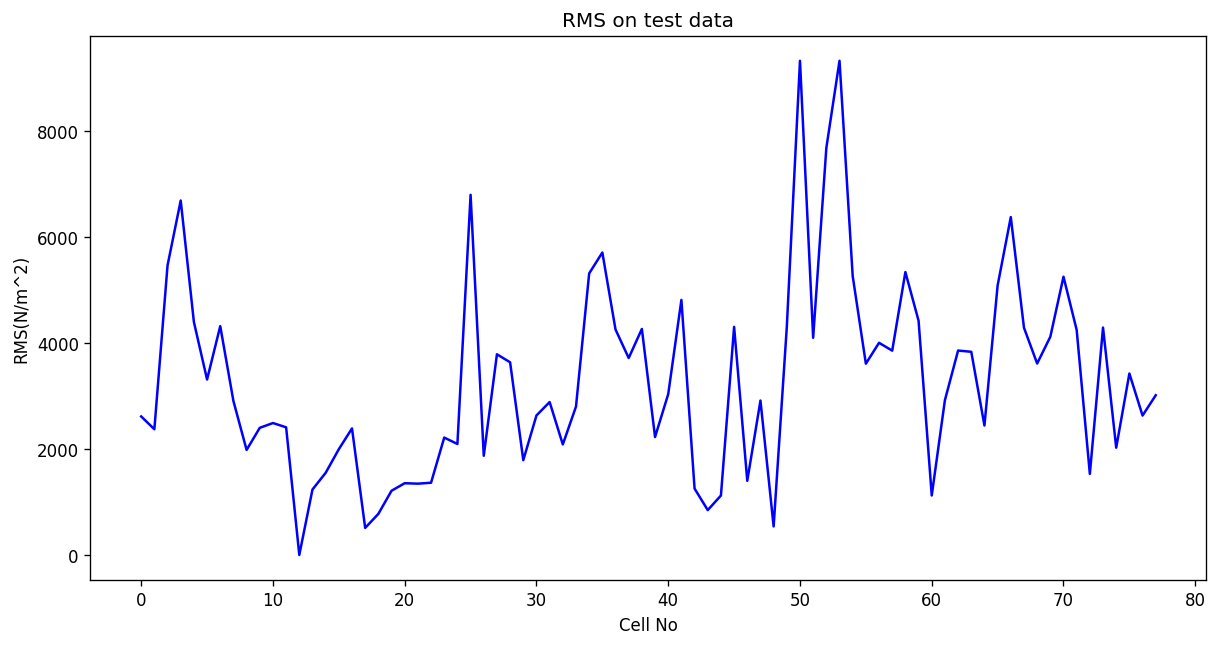

In [ ]:
i=146
# plot baseline and predictions
figure(num=None, figsize=(12, 6), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data),color='b')
# plt.show()
# plt.plot(df[i],color='g',label="Train")
# print('testPrices:')
# testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


# plt.plot(df1[i], label="test")
# plt.legend()
plt.title('RMS on test data')
plt.xlabel('Cell No')
plt.ylabel('RMS(N/m^2)')

plt.show()




In [ ]:
data=np.genfromtxt('/content/drive/My Drive/Colab Notebooks/new_test_err.csv',delimiter=',')


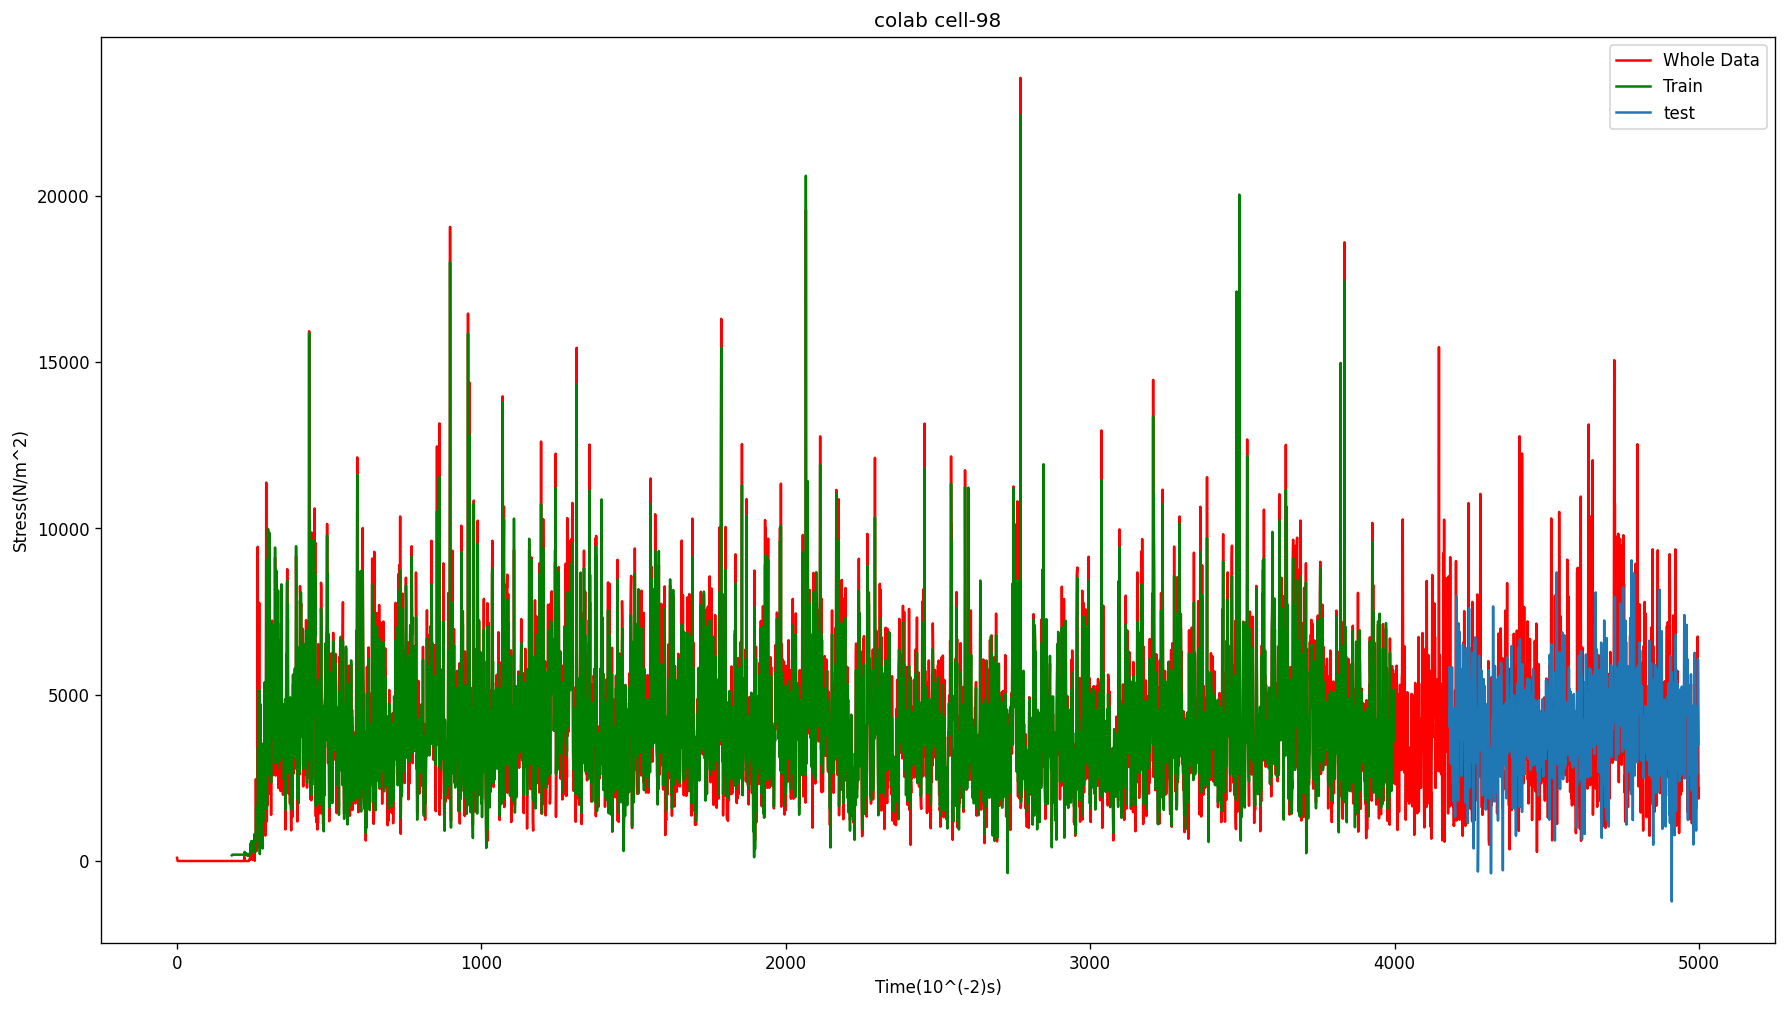

In [ ]:
i=98
# plot baseline and predictions
figure(num=None, figsize=(18, 10), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[i]),color='r',label="Whole Data")
# plt.show()
plt.plot(df[i],color='g',label="Train")
# print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


plt.plot(df1[i], label="test")
plt.legend()
plt.title('colab cell-'+str(i))
plt.xlabel('Time(10^(-2)s)')
plt.ylabel('Stress(N/m^2)')
plt.show()




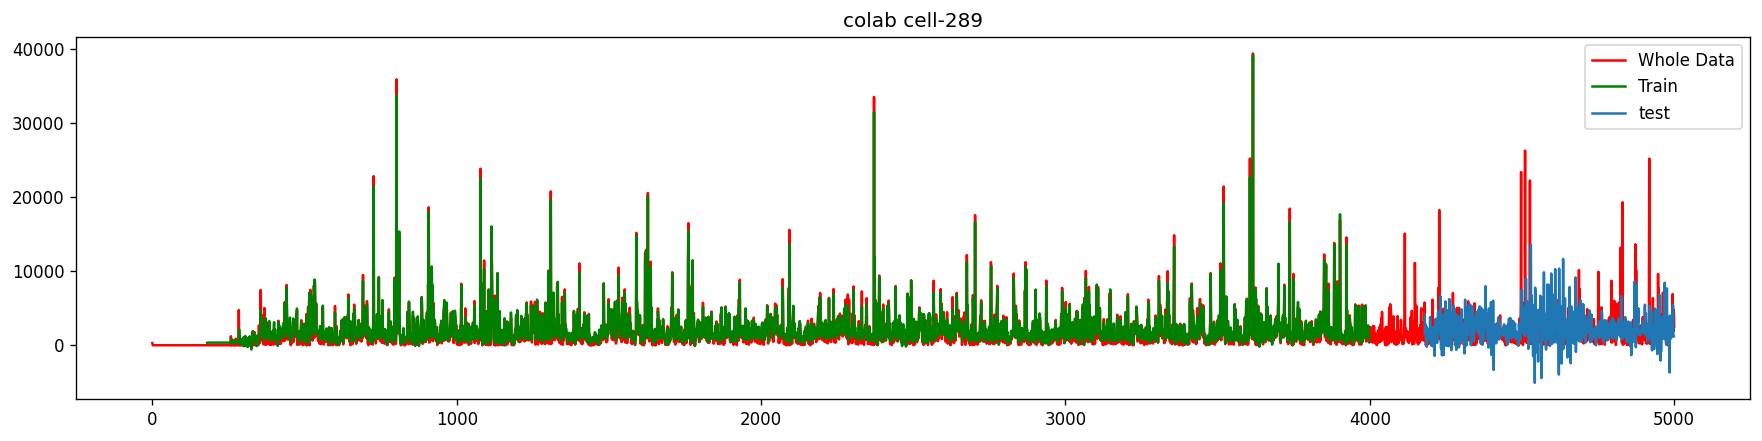

In [ ]:

# plot baseline and predictions
figure(num=None, figsize=(18, 4), dpi=120, facecolor='w', edgecolor='k')

plt.plot((data[f]),color='r',label="Whole Data")
# plt.show()
plt.plot(trainPredictPlot,color='g',label="Train")
# print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


plt.plot(testPredictPlot, label="test")
plt.legend()
plt.title('colab cell-'+str(f))
plt.show()




In [ ]:
np.savetxt("/content/drive/My Drive/Colab Notebooks/train_err.csv", err, delimiter=",")


In [ ]:
  # df.to_csv('/content/gdrive/My Drive/Colab Notebooks/test_predct.csv')
  # df1.to_csv('/content/gdrive/My Drive/Colab Notebooks/original data.csv')

In [ ]:
data=np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/test_predct.csv',delimiter=',')


In [ ]:
data1=np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/train_predct.csv',delimiter=',')


In [ ]:
# data

In [ ]:
data1=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train_predct.csv')
data2=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test_predct.csv')


In [ ]:
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
1,1,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
2,2,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
3,3,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
4,4,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
5996,5996,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
5997,5997,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
5998,5998,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]


In [ ]:
data2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
1,1,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
2,2,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
3,3,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
4,4,[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,[416.23153687],[825.04095459],[1143.97399902],[1042.24536133],[1438.76867676],[830.47747803],[1126.203125],[1782.72167969],[2622.57055664],[2305.88037109],[1023.50183105],[305.89453125],[747.35089111],[1601.68688965],[2181.21728516],[231.62591553],[1099.11535645],[1340.1619873],[2174.22387695],[3865.67382812],[1735.83190918],[1718.70629883],[3197.78588867],[1575.38806152],[426.02990723],[2452.77905273],[2340.95727539],[906.98712158],[2493.20263672],[394.09628296]
5996,5996,[402.73580933],[803.92364502],[1193.29321289],[969.6953125],[1518.57250977],[828.03771973],[1074.75915527],[1754.50354004],[2643.42407227],[2172.56762695],[887.85803223],[311.8598938],[712.38439941],[1709.81677246],[2055.14892578],[237.51646423],[987.53704834],[1249.9810791],[2170.64941406],[3733.84033203],[1693.75036621],[1724.89587402],[3127.70336914],[1551.04980469],[459.69076538],[2480.4753418],[2323.99316406],[936.87329102],[2465.34008789],[385.12402344]
5997,5997,[413.92041016],[828.21203613],[1239.5645752],[927.88397217],[1902.62084961],[812.0213623],[1027.55273438],[1778.65319824],[2496.1965332],[2096.90332031],[827.80053711],[304.79541016],[724.58380127],[1913.93457031],[2038.7088623],[247.87625122],[862.36096191],[1120.80505371],[2171.56787109],[3871.71728516],[1732.9744873],[1763.14440918],[3073.82714844],[1494.19311523],[474.668396],[2472.29125977],[2299.73510742],[944.06469727],[2522.08984375],[382.6217041]
5998,5998,[416.3175354],[908.11816406],[1240.70239258],[985.53051758],[1938.81005859],[776.81048584],[1025.52307129],[1757.63708496],[2315.24926758],[2140.48217773],[773.82202148],[275.09115601],[835.48748779],[2066.54638672],[2106.50244141],[253.16690063],[744.78460693],[1006.38092041],[2252.80322266],[4094.9375],[1723.6739502],[1788.4786377],[3115.38671875],[1448.8371582],[475.77740479],[2436.72045898],[2317.12915039],[947.88067627],[2611.02172852],[377.19198608]


In [ ]:
# df[str(0)]

In [ ]:
# df[0]

In [ ]:
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  # ff.append(testScore)


In [ ]:
d=[]


In [ ]:
d1=np.array(data1)
d2=np.array(data2)


In [ ]:
d=d1

In [ ]:
d[4870:5999,:]=d2[4870:5999,:]

In [ ]:
np.savetxt("/content/gdrive/My Drive/Colab Notebooks/all_predict.csv", list(d))


TypeError: ignored

In [ ]:
type(d)

numpy.ndarray

In [ ]:
d.shape

(6000, 31)

In [ ]:
d2[4832,1]

'[nan]'

In [ ]:
d

array([[0, '[nan]', '[nan]', ..., '[nan]', '[nan]', '[nan]'],
       [1, '[nan]', '[nan]', ..., '[nan]', '[nan]', '[nan]'],
       [2, '[nan]', '[nan]', ..., '[nan]', '[nan]', '[nan]'],
       ...,
       [5997, '[413.92041016]', '[828.21203613]', ..., '[944.06469727]',
        '[2522.08984375]', '[382.6217041]'],
       [5998, '[416.3175354]', '[908.11816406]', ..., '[947.88067627]',
        '[2611.02172852]', '[377.19198608]'],
       [5999, '[nan]', '[nan]', ..., '[nan]', '[nan]', '[nan]']],
      dtype=object)

In [ ]:
df=pd.DataFrame(d)

In [ ]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/all_predct.csv')


In [ ]:
dd=np.genfromtxt('/content/gdrive/My Drive/Colab Notebooks/all_predict.csv')


In [ ]:
dd.dtype

dtype('float64')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
np.savetxt('/content/gdrive/My Drive/Colab Notebooks/all_predict1.txt', dd, newline=" ")   # X is an array


In [ ]:
import numpy as np
import scipy.io

x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x)

scipy.io.savemat('test.mat', dict(x=x, y=y))


In [ ]:
scipy.io.savemat('/content/gdrive/My Drive/Colab Notebooks/all_done.mat', dict(x=dd))

In [ ]:
adict = {}
adict['all_predict'] = dd
scipy.io.savemat('/content/gdrive/My Drive/Colab Notebooks/all_done.mat', adict)


In [ ]:
dd.shape

(6001,)

In [ ]:
dd

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:


dd=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/all_predict.csv')


In [ ]:
dd.shape

(6000, 32)

In [ ]:
import pandas as pd
import scipy.io
# MyDataFrame = pd.read_csv('eeg.txt',sep=';',decimal='.')
# truncDataFrame = MyDataFrame[0:1000] # reduce data size for test purposes
scipy.io.savemat('/content/gdrive/My Drive/Colab Notebooks/all_is.mat', dd)
